In [481]:
import numpy as np
import matplotlib.pyplot as plt

Now that the libraries required are imported, we will set up a grid size of 100x100. 

Next, we creare an array of the 24 color shades of RGB to be represented in this grid

We also make sure to normalize the color codes (which are currently from 0 to 255) to 0 to 1.

In [482]:
# setting up a grid of size 100x100
grid_size = 100         

#Setting up an array for the RGB code for the 24 colors:
code_of_color =np.array([[255,0,0],[139,0,0],[128,0,0],[255,69,0],[0,128,0],
                  [0,100,0],[144,238,144],[0,255,0],[0,0,255],[0,0,139],[65,105,225],
                  [135,206,235],[255,255,0],[240,230,140],[218,165,32],[255,215,0],[0,128,128],
                  [0,255,255],[0,206,209],[0,139,139],[255,192,203],[255,105,80],
                         [255,20,147],[255,182,193]])

#Naming the 24 colors we chose:
name_of_color = ['red','park_red','maroon','orange_red','green','park_green',
               'light_green','lime','blue','dark_blue','royal_blue','sky_blue',
               'yellow','khaki','golden_rod','gold','teal','aqua',
            'turquoise','dark_cyan','pink','hot_pink','deep_pink','light_pink']

# normalizing the color codes to be between 0 and 1:
code_of_color = code_of_color/255

We initialize the weights by setting them to some small values:

In [8]:
#function for random initialization of weights
def assigning_rand_weights(size):
  grid_size = size
  #weights are inserted into an array 100x100x3 
  #since we have three channels: R,G,B
  weights = np.empty([grid_size*grid_size,3])     
  for i in range(0,grid_size*grid_size):
    for j in (0,1,2):
      weights[i][j] = np.random.randint(0,256)/255
  return weights


Then, we store the initialized weights from the function above in a temporary array 'temp1'

In [484]:
temp1 = assigning_rand_weights(100)

Now, we set up an array for the output grid, initially filled with just zeroes:

In [4]:
#function for setting up an empty array for the output grid
def initialise_output_grid(size):
  grid_size = size
  output_grid = np.zeros((grid_size*grid_size,2))
  m=0
  for i in range(grid_size):
    for j in range(grid_size):
      output_grid[m,:] = [i,j]
      m = m+1
  return output_grid

And we store that initial empty output grid in a temporary array 'temp2'

In [486]:
temp2 = initialise_output_grid(100)

Now, we write a function to find the neuron with the closest 'distance' to the input. 

In [6]:
#function for finding the closest neuron to the input
def closest_node(inputs, weights):
    distance = minimum_distance(inputs, temp1)
    closestnode = distance.argmin()
    return closestnode

The 'distance' is measured as the euclidean distance between the input and neuron, and then sent to the function above for it to determine the closest node.

In [7]:
#means of measuring distance between neurons and input to determine 'closeness'
def minimum_distance(x, temp1): 
  distance = []
  for i in temp1:
    d = np.linalg.norm(x-i)
    distance.append(d)
  return np.array(distance)

Next, we write a function to update the weights for the necessary nodes, once the closest node is found. This function takes the input and weights as parameters, as well as the learning rate and sigma. Sigma σ(t) is the radius of the neighbourhood function, which determines how far neighbour nodes are examined in the grid when updating vectors. It is gradually reduced over time, which leads to reducing the number of neighbours as training advances. This is to assist neurons in adjusting their weights to roughly where they wish to be before allowing them to converge without being significantly influenced by "winning" neurons located far away.

First, we find the closest node to the input, and it is defined as the 'winning node'. Then, the weights of neurons are modified as per to their proximity to this winning node. The winning node, as well as the nodes in its neighbourhood get their weights updated. We expect that similar nodes cluster together after training on numerous repetitions of input data sets, and vice versa.

In [489]:
def weights_weights(learning_rate,sigma,inputs,weights):
    #Finding the closest node to the input:
    temp3 = closest_node(inputs, weights)
    a = np.ceil(temp3 / grid_size)
    b = np.mod(temp3 , grid_size)
    c = minimum_distance(np.array([a, b]), temp2) 
    #updating the neighborhood, and return the updated weights:
    for j in range(0,len(temp1)):
      temp4 = np.exp(-c[j]*c[j]/(2 * sigma **2))     
      temp1[j] = weights[j] + learning_rate*temp4 * (inputs - weights[j])
    return temp1

The function below is the time varying learning rate decay as described in the assignment: 

In [490]:
def learning_rate_decay(current_epoch,total_epoch,learningRate):
  return learningRate* np.exp(-current_epoch/total_epoch)

The function below is the reduction of the neighbourhood radius over time:

In [491]:
def sigma_decay(current_epoch,total_epoch,sigma_new):
  return sigma_new*np.exp(-current_epoch/total_epoch)

The function below simply plots the required graphs. The plot contains 4 subplots for each sigma, as it varies with number of epochs increasing from 20 to 40 to 100 to 1000. This function takes as input the learned weight which is an array containing 4 arrays, in which the updated weights for each of the 4 epoch options are stored. 

In [493]:
def plot_data(learned_wts):
  plt.figure(figsize=(20, 20))
  plt.subplot(141)
  plt.title('epoch=20')
  plt.imshow(learned_wts[0])
  plt.subplot(142)
  plt.title('epoch=40')
  plt.imshow(learned_wts[1])
  plt.subplot(143)
  plt.title('epoch=100')
  plt.imshow(learned_wts[2])
  plt.subplot(144)
  plt.title('epoch=1000')
  plt.imshow(learned_wts[3])

In the function below, we finally combine all the functions that were defined above and piece them together. This is the main SOM function that will be used as we vary the number of epochs, as it is the only parameter required. 

In [494]:
def SOM_learning(sigma_new):
    #Initialize an empty array for the learned weights
    learned_wts_list = []     
    #The maximum number of epochs we go up to is 1000, so thats what we initialize this variable to
    total_epoch = 1000
    #The learning rate is set to 0.8 as per assignment guidlines
    learningRate = 0.8        
    #We set the neighbourhood to the value passed when this function was called
    sigma = sigma_new 
    #We store the learning rate into this new variable.
    learning_rate = learningRate  
    temp_arr =np.zeros((10000,3)) 
    w_n = temp_arr.copy()
    temp1 = initialise_random_weights(100)  #intiialize the random weights 
    #Now, we cycle through the list below which contains all our epochs which 
    #we want to do the analysis of:
    epoch_list = [20, 40, 100, 1000]
    for x in epoch_list:
        for n in range(0,total_epoch):
            i = np.random.randint(0,24)
            temp1 = weights_weights(learning_rate,sigma,color_codes[i],temp1)
            learning_rate = learning_rate_decay(n,total_epoch,learningRate)
            sigma = sigma_decay(n,total_epoch,sigma_new)
            if (n==x-1):                
                w_n = temp1.copy()
                w_n = w_n.reshape(100,100,3)
                #For each epoch, we append a new array of weights into this 
                #main list of learned weights. 
                #We end up with 4 of these arrays in the list since we have 
                #4 options in our epoch list
                learned_wts_list.append(w_n)
    #finally, we take this array and pass it into the plotting function, 
    #as the last step of our main SOM function 
    plot_data(learned_wts_list)

For our visualization, we will generate a figure of the original grid filled with random weights. The image just shows us a 100x100 grid of haphazardly organized colors of different hues and shades. There is obviously no organization of similar colors at the moment.


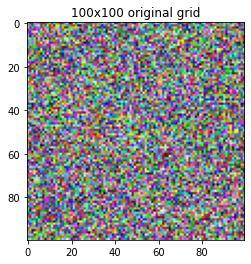

In [495]:
starting_weights = assigning_rand_weights(100)
starting_weights = starting_weights.reshape(grid_size,grid_size,3)
plt.figure(figsize=(4, 4))
plt.title('100x100 original grid')
plt.imshow(starting_weights)

Now that we can see the input, we will start to run our main SOM function by passing different values of the neighbourhood parameter, sigma. 

We start with sigma = 1:

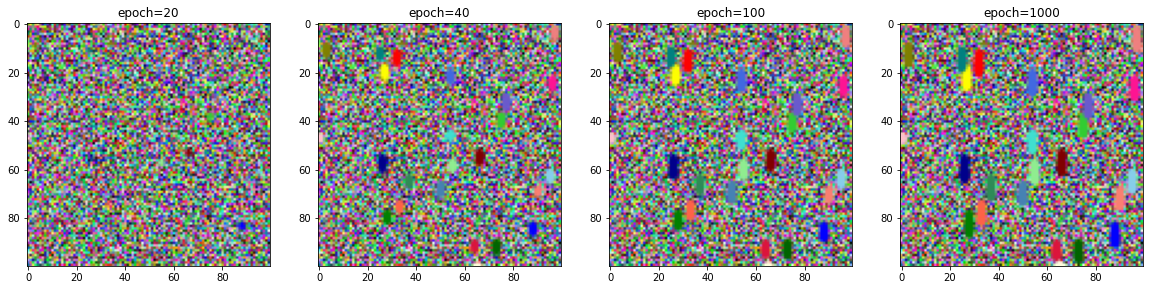

In [496]:
SOM_learning(sigma_new=1) 

We can see that increasing the epochs clearly allows better grouping of some similar clusters, showing us some small clusters throughout the grid of solid colors. The clusters do begin at epochs=40, but get gradually larger as we approach epoch=1000. The final result is not considered a great one, as most colors remain unclassified with their similar colors.

Now, we try sigma=10:

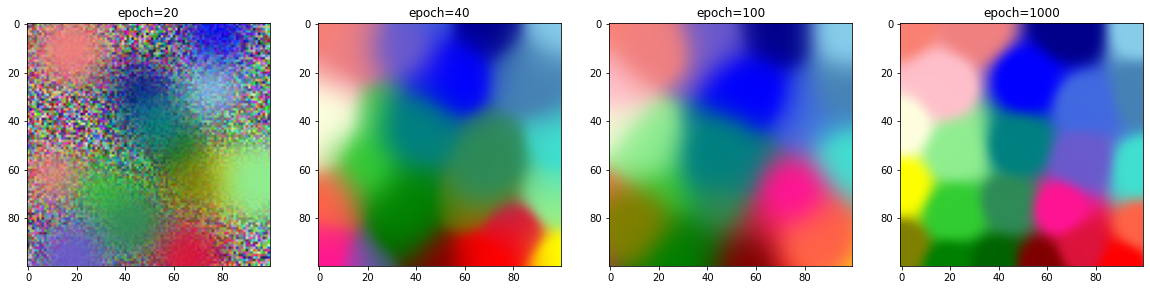

In [497]:
SOM_learning(sigma_new=10) 

Compared to sigma=1, we see clearly better overall performance with this sigma=10. From the first epoch=20, we see cloudy clusters of similar colors, which get more precise and segregated as we reach epoch=1000. The final result shows every single color was clustered into one of the 24 colors. We do notice, however, that the clusters have very blurry edges. 

Now, we try sigma=30:

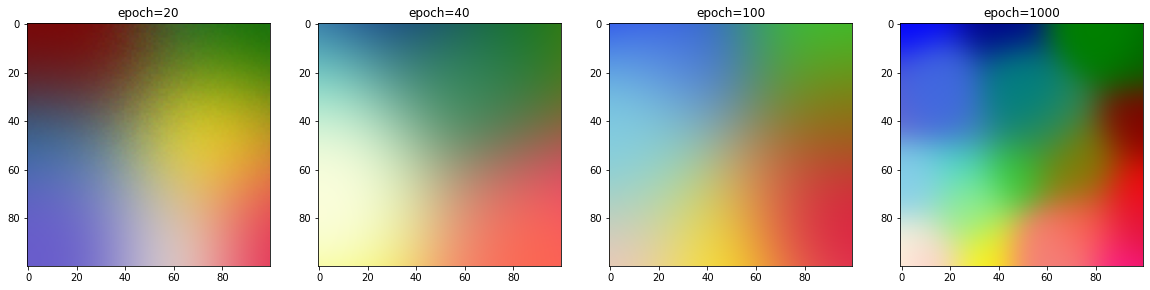

In [501]:
SOM_learning(sigma_new=30)

In this sigma, we see that more distinct clusters of colors are formed by the final epoch=1000, as compared to the start of epoch=20.But in all epoch cases, the clusters are so blurry to the point that they are bleeding into each other. It does not give us a very good clustering and organization of the colors, but we can see a solid attempt was made for colors to approach other colors that are 'similar' to them in terms of their RGB values. 

Now, we try sigma=50:

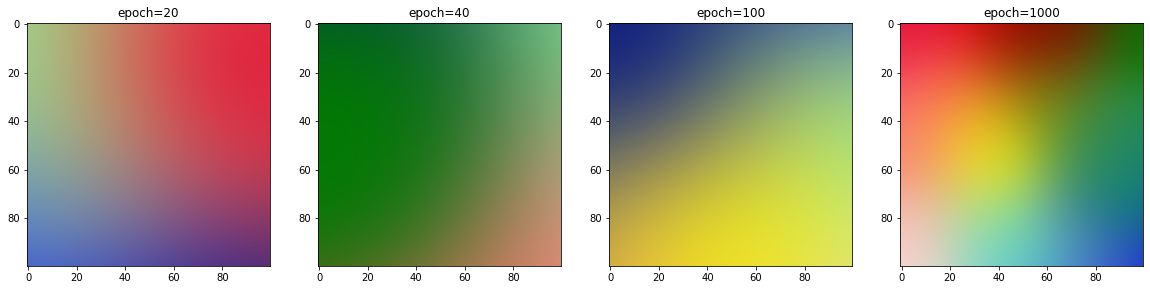

In [499]:
SOM_learning(sigma_new=50)

The clustering power here is similar to that of sigma=30, where the final epoch=1000 has the best result of the 4 epoch cases. However, even in that case, the edges are so incredibly blurry to the point where the 24 color classes are bleeding into each other. We can see in epoch=40, we cannot even see any hues other that the green and slighty peachy tones. 

Finally, we try sigma=70:

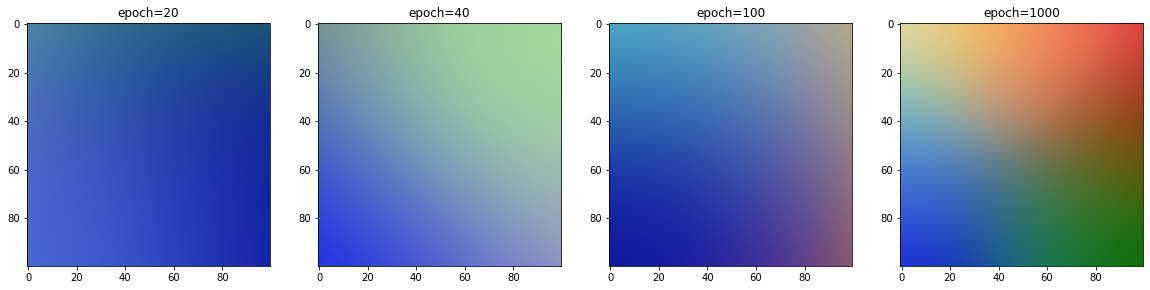

In [502]:
SOM_learning(sigma_new=70)

In this final sigma, we see the worst case from the ones we have tried so far. Epoch=20 and epoch=100, both only show us blueish hues, whereas epoch=40 only shows us the blue and green hues. We see the colors are attempted to being clustered into the 24 different colors by epoch=1000, but the edges are still so blurry that the clusters are bleeding into each other. 

In conclusion, the above images show us that in all sigma cases, lower epochs do not give good clustering results. This indicates that increasing the neighbourhood radius parameter, while retaining a low number of epochs does not improve the funcionality of this algorithm. But it is obvious to see in every sigma case, that increasing epochs shows us more prominent and clear clustering into the desired 24 colors. 